In [1]:
# Warning: Notebook can take around 3 minutes to run

# Predicting Vaccinations Against Infectious Diseases
## Machine learning modeling project
Flatiron School Data Science: Project 3
- **Author**: Zaid Shoorbajee
- **Instructor**: Matthew Bombard
- **Pace**: Flex, 20 weeks

## Overview and Business Understanding

It's part of the role of public health authorities to oversee the production and distribution of vaccines to the public, as well as to inform the public about vaccines' use and effectiveness. Along with the tragedy and global upheaval of the COVID-19 pandemic came the problem of fighting vaccine hesitancy. Someone's decision get or to not get the shot could be influenced by their demographic background, opinions about vaccines, as well as healthcare circumstances.

In this scenario, a public health agency wants to use data and machine learning understand what factors affect someone's decision to get vaccinated. It also wants to be able to predict whether someone will get vaccinated based on those factors. This is an exercise that might aid in vaccination efforts for the current COVID-19 pandemic, but it also can inform efforts to get ahead of the crisis should another epidemic arise.

 

## Data Understanding

As COVID-19 has consumed the world's collective attention for more than two years, it's easy to forget that the world dealt with another pandemic not too long ago. Although it didn't disrupt world activities the same way COVID-19 has, the H1N1 virus (A.K.A swine flu) was a major cause for concern in 2009 and 2010.

At the time public health authorities in the U.S. sought to understand more about people's immunization behaviors as a result of the H1N1 outbreak. The Centers for Disease Control and Prevention (CDC) conducted phone surveys, collecting information about whether individuals had gotten the H1N1 and seasonal flu vaccines during the 2009-2010 flu season. The survey also recorded their opinions on the vaccines, viruses, and demographic information.

### Dataset and feaures
Data from this survey has been made available through a competition hosted by <a href="https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/">DrivenData</a>.

The dataset cointains answers from 26,707 survey respondents with 35 features. The features include:
* Bevioral information (E.g. Did respondent bought a facemask? Do they wash their hands frequently?
* Health care information (E.g. Do they have health insurance? Did a doctor recommed they get the seasonal and/or H1N1 vaccine?)
* Demographic information (E.g. age group, education level, race)
* Socioeconomic infromation (E.g. income level, homeowner status, number of household adults and children)
* Geographic information (Region and whether they live in a metropolitan area)
* Employment information (industry and occupation)

The features are combination of binary, ordinal, and categorical variables.

### Target variable
The target variables available are two binary variables representing whether the respondent received a seasonal flu vaccine and whether they received an H1N1 vaccine. **This project will focus on one target variable: recieving the H1N1 vaccine.**

### Scoring
.

.

.

.

## Data preparation

In [2]:
# Imports

# This part is to record how long the notebook takes to run
import time
start_time = time.time()

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, get_scorer

pd.options.display.max_columns = None
seed = 50

**Reading in the dataset**. This is from an online competition on DrivenData, so the provided test set doesn't have labels. For this reason I'll treat the provided training set and labels as a the whole dataset, on which I will later peform a train-test split.

In [3]:
features = pd.read_csv('data/training_set_features.csv')
target = pd.read_csv('data/training_set_labels.csv')

In [4]:
data = pd.concat([features, target], axis=1)

In [5]:
data = data.drop(columns=['respondent_id', 'seasonal_vaccine'])

In [6]:
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [8]:
(data.isna().sum() / len(data)) * 100

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

#### Observations:
There are several features with a large amount of data missing. I'll have to either impute them with some value or drop them. 

In particular, `health_insurance` has 46% of its data missing, but I would rather not drop that whole feature because it seems pertinent to the matter of taking an H1N1 vaccine. 

`employment_industry` and `employment_occupation` have half their data missing. The values are encoded in an odd way and are not interpretable, so I'll drop these columns.

In [9]:
X = data.drop(columns=['h1n1_vaccine', 'employment_industry', 'employment_occupation'])
y = data['h1n1_vaccine']

#### Train-test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

In [11]:
# Separate numerical and object columns in order to use different imputing strategies

X_train_num = X_train.select_dtypes('number')
X_train_obj = X_train.select_dtypes('object')

# Encoding object columns with numbers

ord_encoder = OrdinalEncoder()
X_train_obj = pd.DataFrame(ord_encoder.fit_transform(X_train_obj), columns=X_train_obj.columns, index=X_train_obj.index)

#### Imputing all missing values with the mean or nearest neighbor

In [12]:
num_imputer = SimpleImputer(strategy='mean')
obj_imputer = KNNImputer()

In [13]:
# Imputing missing numerical values with the mean from that column
imputed_x_train_num = pd.DataFrame(num_imputer.fit_transform(X_train_num), columns=X_train_num.columns, index=X_train_num.index)

# Imputing missing numerical values with the nearest neighbor
imputed_x_train_obj = obj_imputer.fit_transform(X_train_obj)

# Undoing the ordinal encoding, in order to one-hot encode
imputed_x_train_obj = pd.DataFrame(ord_encoder.inverse_transform(imputed_x_train_obj), columns=X_train_obj.columns, index=X_train_obj.index)

# Combining the numerical and object data
X_train_imp = pd.concat(
    [
       imputed_x_train_num,
       imputed_x_train_obj
    ],
    axis=1
)

In [14]:
X_train_imp.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
16087,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.000000,5.0,2.0,4.0,5.0,2.0,1.0,2.0,0.0,18 - 34 Years,Some College,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,oxchjgsf,"MSA, Principle City"
9261,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.880081,5.0,2.0,4.0,5.0,4.0,1.0,1.0,0.0,65+ Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,bhuqouqj,Non-MSA
16193,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.880081,5.0,2.0,2.0,5.0,4.0,2.0,0.0,2.0,45 - 54 Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
18216,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.880081,4.0,4.0,4.0,5.0,2.0,1.0,0.0,0.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Rent,Employed,dqpwygqj,"MSA, Principle City"
9161,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,5.0,4.0,1.0,5.0,5.0,1.0,1.0,0.0,55 - 64 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City"


No more missing values

In [15]:
X_train_imp.isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment

#### One-hot encoding and scaling

In [16]:
X_train_ohe = pd.get_dummies(X_train_imp)

In [17]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_ohe), columns=X_train_ohe.columns, index=X_train_ohe.index)
X_train_scaled = X_train_ohe

In [18]:
X_train_scaled.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
16087,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.000000,5.0,2.0,4.0,5.0,2.0,1.0,2.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9261,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.880081,5.0,2.0,4.0,5.0,4.0,1.0,1.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
16193,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.880081,5.0,2.0,2.0,5.0,4.0,2.0,0.0,2.0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
18216,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.880081,4.0,4.0,4.0,5.0,2.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9161,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,5.0,4.0,1.0,5.0,5.0,1.0,1.0,0.0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


#### Applying preprocessing steps to test set

In [19]:
X_test_num = X_test.select_dtypes('number')
X_test_obj = X_test.select_dtypes('object')
X_test_obj = pd.DataFrame(ord_encoder.transform(X_test_obj), columns=X_test_obj.columns, index=X_test_obj.index)

# Imputing missing numerical values with the mean from that column
imputed_x_test_num = pd.DataFrame(num_imputer.transform(X_test_num), columns=X_test_num.columns, index=X_test_num.index)

# Imputing missing numerical values with the nearest neighbor
imputed_x_test_obj = obj_imputer.transform(X_test_obj)

# Undoing the ordinal encoding, in order to one-hot encode
imputed_x_test_obj = pd.DataFrame(ord_encoder.inverse_transform(imputed_x_test_obj), columns=X_test_obj.columns, index=X_test_obj.index)

# Combining the numerical and object data
X_test_imp = pd.concat(
    [
       imputed_x_test_num,
       imputed_x_test_obj
    ],
    axis=1
)

X_test_ohe = pd.get_dummies(X_test_imp)

X_test_scaled = pd.DataFrame(scaler.transform(X_test_ohe), columns=X_test_ohe.columns, index=X_test_ohe.index)

In [20]:
X_test_scaled.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
20463,1.519672,-0.423433,-0.226876,-1.643744,3.683263,0.457501,1.339799,1.397240,6.872148e-01,1.972218,1.494290,-0.642439,-0.302783,-0.361247,4.654300e-16,-1.844427,1.299229e+00,1.959488,0.901472,1.665484,-0.846847,0.147572,1.596300,2.011619,-0.409959,-0.491873,-0.513151,-0.584614,-0.530961,-0.361056,-0.819472,1.673978,-0.293341,-0.265721,3.938626,-1.964808,0.824503,-0.824503,0.785089,-0.620491,-0.339494,-1.114674,1.114674,-1.870318,1.870318,0.901482,-0.804490,-0.242215,-0.285234,-0.347578,-0.207916,-0.375221,-0.347036,-0.287784,-0.440498,3.312477,-0.343504,-0.363260,1.131725,-0.645561,-0.604152
14057,-0.675263,-2.044018,-0.226876,-1.643744,-0.271729,-2.189176,-0.748773,-0.718063,-1.462084e+00,1.972218,1.494290,1.615694,-0.302783,-0.361247,5.027249e-01,-0.848045,-3.480893e-16,-1.004668,0.901472,-1.255640,-0.846847,0.147572,-0.577187,-0.497112,-0.409959,-0.491873,-0.513151,1.710530,1.883376,-0.361056,-0.819472,-0.597379,-0.293341,-0.265721,-0.253896,0.508956,0.824503,-0.824503,0.785089,-0.620491,-0.339494,-1.114674,1.114674,0.534668,-0.534668,-1.109285,1.243024,-0.242215,-0.285234,-0.347578,-0.207916,2.665099,-0.347036,-0.287784,-0.440498,-0.301889,-0.343504,-0.363260,-0.883607,-0.645561,1.655213
8372,0.422204,-0.423433,-0.226876,0.613266,-0.271729,0.457501,-0.748773,-0.718063,6.872148e-01,-0.550405,-0.726445,-0.642439,-0.302783,-0.361247,-3.689496e+00,0.148336,1.299229e+00,1.218449,-0.025097,0.935203,1.427325,0.147572,2.683044,2.011619,-0.409959,-0.491873,-0.513151,-0.584614,1.883376,-0.361056,-0.819472,-0.597379,-0.293341,-0.265721,3.938626,-1.964808,-1.212852,1.212852,0.785089,-0.620491,-0.339494,-1.114674,1.114674,-1.870318,1.870318,0.901482,-0.804490,-0.242215,-0.285234,-0.347578,-0.207916,-0.375221,2.881544,-0.287784,-0.440498,-0.301889,-0.343504,-0.363260,1.131725,-0.645561,-0.604152
21740,-1.772730,-0.423433,0.000000,0.000000,-0.271729,0.457501,-0.748773,-0.718063,2.386201e-16,-0.550405,1.494290,1.615694,-0.302783,-0.361247,5.027249e-01,-0.848045,5.154020e-01,-1.004668,0.901472,-0.525359,-0.846847,-1.181781,-0.577187,-0.497112,-0.409959,-0.491873,-0.513151,1.710530,-0.530961,-0.361056,-0.819472,1.673978,-0.293341,-0.265721,-0.253896,0.508956,0.824503,-0.824503,0.785089,-0.620491,-0.339494,-1.114674,1.114674,-1.870318,1.870318,-1.109285,1.243024,-0.242215,-0.285234,-0.347578,-0.207916,-0.375221,-0.347036,-0.287784,-0.440498,-0.301889,-0.343504,2.752846,-0.883607,-0.645561,1.655213
15147,0.422204,-0.423433,-0.226876,0.613266,-0.271729,0.457501,1.339799,-0.718063,-1.462084e+00,0.000000,0.000000,-0.642439,-0.302783,2.854550,4.654300e-16,0.148336,-2.684253e-01,1.218449,0.90

## Modeling

#### A function to show various metrics for a given fitted model

In [21]:
# A function that shows training and cross-validated scores for a fitted model.
def model_cv_results(estimator, X, y_true, metrics=['accuracy', 'roc_auc'], cv=True, k=5):
    """
    Returns a DataFrame with training scores and mean cross validation scores for a model.
    The function is preset to return scores for accuracy and roc_auc.
    If running this function on a test set, cv should be set to False.
    This function can often take a few minutes to run.
    """
    all_train_scores = []
    all_cv_scores = []
    
    for m in metrics:
        scorer = get_scorer(m)
        train_score = scorer(estimator, X, y_true)
        all_train_scores.append(train_score)
    
    if cv:
        cv_results = cross_validate(estimator, X, y_true, scoring=metrics, cv=k)
        for m in metrics:
            mean_cv_score = np.mean(cv_results['test_' + m])
            all_cv_scores.append(mean_cv_score)

        df = pd.DataFrame(zip(all_train_scores, all_cv_scores), columns=['train_score', 'mean_cv_score'], index=metrics)
        return df
    else:
        df = pd.DataFrame(data=all_train_scores, index=metrics, columns=['score'])
        return df

#### Now I will run vanilla (untuned) versions of several classification models and see which performs best. I'll then choose the best one in order to tune.

### Logistic Regression Model

In [22]:
logreg = LogisticRegression(random_state=seed)

In [23]:
logreg.fit(X_train_scaled, y_train)

C:\Users\zshoo\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=50)

In [24]:
logreg_results = model_cv_results(logreg, X_train_scaled, y_train)
logreg_results

C:\Users\zshoo\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\zshoo\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

,train_score,mean_cv_score
accuracy,0.839690,0.838342
roc_auc,0.839146,0.836473


In [25]:
# Making a function to keep track of all models and results in a single dictionary.

models_dict = {
    'models': {},
    'results': {}
}

def store_model(name, model, results, dictionary=models_dict):
    """
    Stores models and results for later use and comparison.
    """
    dictionary['models'][name] = model
    dictionary['results'][name] = results

In [26]:
store_model('logreg', logreg, logreg_results)

### Random Forest Classifier

In [27]:
rfc = RandomForestClassifier(random_state=seed)

In [28]:
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=50)

In [29]:
rfc_results = model_cv_results(rfc, X_train_scaled, y_train)
rfc_results

,train_score,mean_cv_score
accuracy,0.99995,0.851523
roc_auc,1.00000,0.858275


In [30]:
store_model('rfc', rfc, rfc_results)

### Adaboost Classifier

In [31]:
adaboost = AdaBoostClassifier(random_state=seed)

In [32]:
adaboost.fit(X_train_scaled, y_train)

AdaBoostClassifier(random_state=50)

In [33]:
adaboost_results = model_cv_results(adaboost, X_train_scaled, y_train)
adaboost_results

,train_score,mean_cv_score
accuracy,0.853520,0.852521
roc_auc,0.865581,0.861693


In [34]:
store_model('adaboost', adaboost, adaboost_results)

### Gradient Boosting Classifier

In [35]:
gbt = GradientBoostingClassifier(random_state=seed)

In [36]:
gbt.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=50)

In [37]:
gbt_results = model_cv_results(gbt, X_train_scaled, y_train)
gbt_results

,train_score,mean_cv_score
accuracy,0.862856,0.857564
roc_auc,0.879027,0.867416


In [38]:
store_model('gbt', gbt, gbt_results)

### Comparing Model Results

In [39]:
for name, results in models_dict['results'].items():
    print('='*10 + f' Training results for model: {name}: ' + '='*10)
    display(results)

# These outputs were displayed before. Here I'm putting them in one place for comparison.

========== Training results for model: logreg: ==========


,train_score,mean_cv_score
accuracy,0.839690,0.838342
roc_auc,0.839146,0.836473


========== Training results for model: rfc: ==========


,train_score,mean_cv_score
accuracy,0.99995,0.851523
roc_auc,1.00000,0.858275


========== Training results for model: adaboost: ==========


,train_score,mean_cv_score
accuracy,0.853520,0.852521
roc_auc,0.865581,0.861693


========== Training results for model: gbt: ==========


,train_score,mean_cv_score
accuracy,0.862856,0.857564
roc_auc,0.879027,0.867416


In [40]:
# Sorting the models by highest AUC score

model_names = []
train_scores = []
mean_cv_scores = []

for name, results in models_dict['results'].items():
    model_names.append(name)
    auc_scores = results.loc['roc_auc']
    train = auc_scores['train_score']
    cv = auc_scores['mean_cv_score']
    train_scores.append(train)
    mean_cv_scores.append(cv)

sorted(list(zip(model_names, mean_cv_scores)), key=lambda x: x[1], reverse=True)

[('gbt', 0.8674160384683154),
 ('adaboost', 0.8616926720535739),
 ('rfc', 0.8582745040367122),
 ('logreg', 0.8364730343394582)]

#### The gradient boosting classifier model had the highest AUC score on the cross-validation. That is the model I'm chosing in order to tune for better performace.

#### Visualizing model peformance so far:

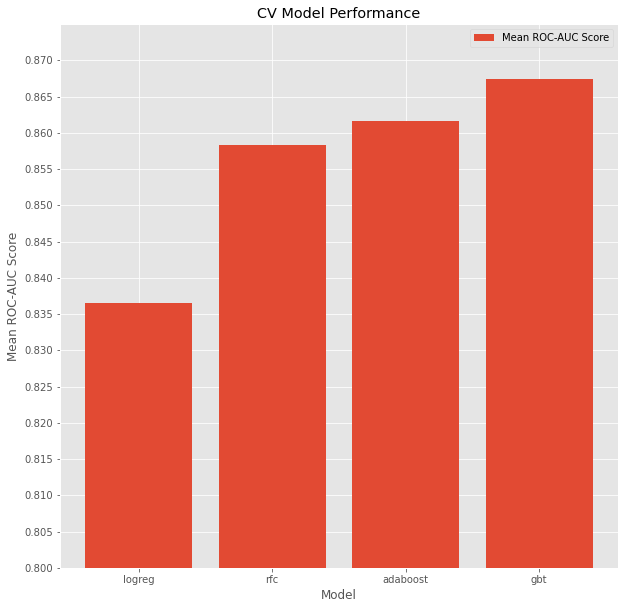

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(model_names, mean_cv_scores, label='Mean ROC-AUC Score')
ax.set_xticks(list(range(len(model_names))))
ax.set_xticklabels(model_names)
ax.set(ylim=(.8, .875))
ax.set_yticks(np.arange(.8, .875, .005))
ax.set_xlabel('Model')
ax.set_ylabel('Mean ROC-AUC Score')
ax.set_title('CV Model Performance')
ax.legend();

### Grid Seach on Gradient Boosting Classifier

In [42]:
grid_gbt = {
    'n_estimators': [100, 150],
    'max_depth': [2, 3, 4],
    'max_features': ['auto', 10, 20]
}

gs_gbt = GridSearchCV(
    estimator=gbt,
    param_grid=grid_gbt,
    cv=5,
    scoring='roc_auc'
)

gs_gbt.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=50),
             param_grid={'max_depth': [2, 3, 4],
                         'max_features': ['auto', 10, 20],
                         'n_estimators': [100, 150]},
             scoring='roc_auc')

In [43]:
gbt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 50,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [44]:
gs_gbt.best_params_

{'max_depth': 4, 'max_features': 20, 'n_estimators': 150}

In [45]:
gs_gbt_results = model_cv_results(gs_gbt.best_estimator_, X_train_scaled, y_train)
gs_gbt_results

,train_score,mean_cv_score
accuracy,0.873989,0.858412
roc_auc,0.898490,0.869311


In [46]:
store_model('gs_gbt', gs_gbt.best_estimator_, gs_gbt_results)

#### Comparing the models again

In [47]:
model_names.append('gs_gbt')
train_scores.append(gs_gbt_results.loc['roc_auc']['train_score'])
mean_cv_scores.append(gs_gbt_results.loc['roc_auc']['mean_cv_score'])

sorted(list(zip(model_names, mean_cv_scores)), key=lambda x: x[1], reverse=True)

[('gs_gbt', 0.8693110730714286),
 ('gbt', 0.8674160384683154),
 ('adaboost', 0.8616926720535739),
 ('rfc', 0.8582745040367122),
 ('logreg', 0.8364730343394582)]

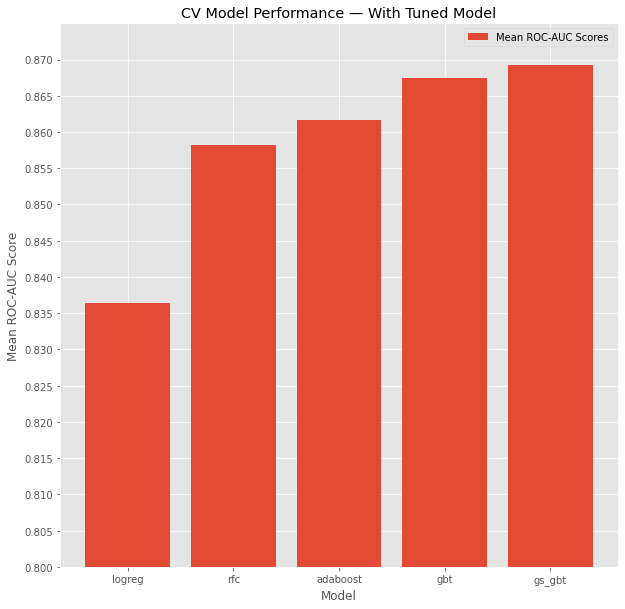

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(model_names, mean_cv_scores, label='Mean ROC-AUC Scores')
ax.set_xticks(list(range(len(model_names))))
ax.set_xticklabels(model_names)
ax.set(ylim=(.8, .875))
ax.set_yticks(np.arange(.8, .875, .005))
ax.set_xlabel('Model')
ax.set_ylabel('Mean ROC-AUC Score')
ax.set_title('CV Model Performance — With Tuned Model')
ax.legend();

#### The tuned GBT classifier performs marginally better than the untuned one.

In [49]:
final_model = gs_gbt.best_estimator_

## Test score

In [50]:
gs_gbt_results

,train_score,mean_cv_score
accuracy,0.873989,0.858412
roc_auc,0.898490,0.869311


In [51]:
model_cv_results(final_model, X_test_scaled, y_test, cv=False)

,score
accuracy,0.784334
roc_auc,0.690511


#### Final model performance:
.

.

.

.

### Feature importances

In [52]:
def plot_feature_importances(
    model, features=X_train_scaled.columns.tolist(), return_df=False, 
    cutoff=0, figsize=(5,13), regression=False, title=False
    ):

    """
    Plots the feature importances of a model. Can also return DataFrame of those importances
    if specified. 
    Defaults to work with tree based models. Set `regresssion` to True in order to plot
    the coefficients of regression models.
    """
    if regression:
        df = pd.DataFrame(
            zip(X_train_scaled.columns.tolist(), np.abs(model.coef_).tolist()[0]),
            columns=['feature', 'importance']
        ).sort_values(by='importance', ascending=True)[-cutoff:]
    else:
        df = pd.DataFrame(
            zip(X_train_scaled.columns.tolist(), model.feature_importances_.tolist()),
            columns=['feature', 'importance']
        ).sort_values(by='importance', ascending=True)[-cutoff:]

    fig, ax = plt.subplots(figsize=figsize)
    ax.barh(y=df['feature'], width=df['importance'])
    ax.set_ylabel('Feature')
    ax.set_xlabel('Importance')
    if title:
        ax.set_title(title)
    elif cutoff != 0:
        ax.set_title(f'Top {cutoff} features in the model')
    else:
        ax.set_title(f'Feature importances')
    plt.show();

    if return_df:
        return df[::-1]

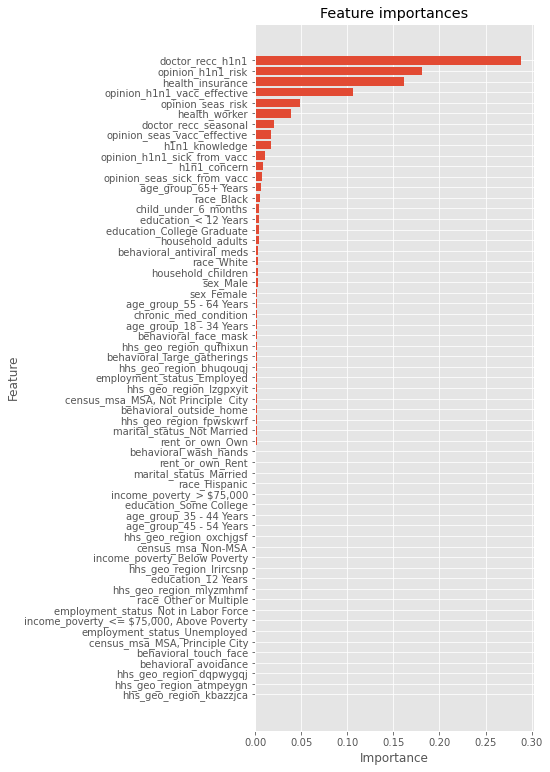

In [53]:
plot_feature_importances(final_model)

In [54]:
###############

In [55]:
# Total time:
print(f'Notebook run in {time.time() - start_time} seconds')

Notebook run in 181.13910245895386 seconds


In [56]:
###############

array([[<AxesSubplot:title={'center':'doctor_recc_h1n1'}>,
        <AxesSubplot:title={'center':'health_insurance'}>],
       [<AxesSubplot:title={'center':'h1n1_vaccine'}>,
        <AxesSubplot:title={'center':'opinion_h1n1_risk'}>],
       [<AxesSubplot:title={'center':'opinion_h1n1_vacc_effective'}>,
        <AxesSubplot:>]], dtype=object)

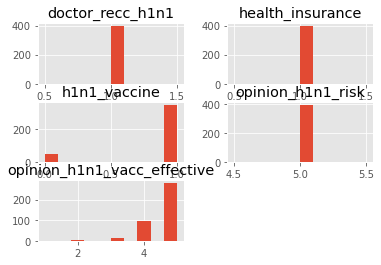

In [57]:
data[['doctor_recc_h1n1', 'health_insurance', 'h1n1_vaccine', 'opinion_h1n1_risk', 'opinion_h1n1_vacc_effective']].dropna().query("doctor_recc_h1n1 == 1 & health_insurance == 1 & opinion_h1n1_risk == 5 & opinion_h1n1_risk == 5").hist()

array([[<AxesSubplot:title={'center':'doctor_recc_h1n1'}>,
        <AxesSubplot:title={'center':'health_insurance'}>],
       [<AxesSubplot:title={'center':'opinion_h1n1_risk'}>,
        <AxesSubplot:title={'center':'opinion_h1n1_vacc_effective'}>],
       [<AxesSubplot:title={'center':'h1n1_vaccine'}>, <AxesSubplot:>]],
      dtype=object)

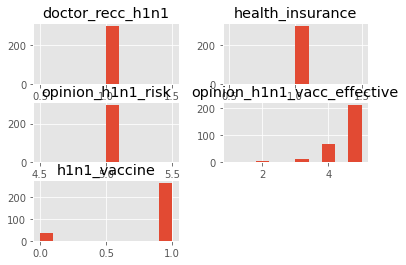

In [58]:
X_train[['doctor_recc_h1n1', 'health_insurance', 'opinion_h1n1_risk', 'opinion_h1n1_vacc_effective']].join(y_train).dropna().query("doctor_recc_h1n1 == 1 & health_insurance == 1 & opinion_h1n1_risk == 5 & opinion_h1n1_risk == 5").hist()